Universidad Galileo

Text Mining and Image Recognition

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

## Problema No. 3:

Descargue el Dataset el cual contiene aproximadamente 800,000
tweets de diversos temas.
Usando CoLab y expresiones regulares. Determine los 3 usuarios más populares dentro del dataset. Luego arme un corpus el cual contenga los siguientes elementos por cada usuario seleccionado:
- Content: Tweet.
- Metadata: ID, Timestamp, Length (este valor hay que calcularlo).



Posterior a tener sus 3 corpus creados, responda: ¿Razón por la que citan a ese usuario? Para esto es necesario que extraiga el contexto de cada tweet y verifique cuales son las palabras que mas rodean al nombre de usuario. Para extraer un contexto valido y debido a la naturaleza del tipo de datos que están disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:
1. Remover stopwords.
2. Realizar stemming y lemmatización.
3. Mostrar un wordcloud con el top 10 para cada usuario.


In [1]:
import re
import numpy as np
import csv
import nltk
import pandas as pd

Como primer paso, se extrae el texto de los tweets en una lista, y los datos completos relevantes en otra.

In [2]:
tweets = []
datos = []
with open("drive/My Drive/Text Mining and Image Recognition/Tweets/tw_source.csv", 'r',encoding = "ISO-8859-1") as file:
    reader = csv.reader(file)
    for row in reader:
      tweets.append(row[-1])
      datos.append(list(row[i] for i in [1, 2, 4, 5] ))

In [3]:
len(datos)

1600000

Posteriormente, se utiliza una expresión regular para encontrar las menciones a los usuarios

In [4]:
usuarios = []
pattern = '\s([@][\w_-]+)'

for tweet in tweets:
  usuario_extraido = re.findall(pattern, tweet)
  if (len(usuario_extraido) != 0):
    usuarios.append(usuario_extraido)

Como la lista se compone de sublistas que contienen los nombres de los usuarios, se prepara una lista plana de menciones, para luego utilizar las funciones de NLTK y encontrar los 3 usuarios que se mencionan más frecuentemente

In [5]:
lista_menciones = []
for sublista in usuarios:
    for item in sublista:
        lista_menciones.append(item)

In [6]:
# Se utiliza la librería nltk para obtener la distribución de frecuencias por usuario
# y obtener los 3 usuarios de Twitter más mencionados en el dataset, y su respectiva frecuencia.
fdist1 = nltk.FreqDist(lista_menciones)
print (fdist1.most_common(3))

[('@mileycyrus', 604), ('@ddlovato', 502), ('@jonasbrothers', 396)]


# Corpus por Usuario

A continuación se presenta la metodología para armar los corpus por usuario solicitado, con la siguiente estructura:
- Tweet
- ID
- TimeStamp
- Longitud (lenght)

### Usuario Popular No. 1: **@mileycyrus**
Extracción de Datos:

In [7]:
datos_usuario_popular1 = []

pattern = '\s(@mileycyrus)+'

indice = 0
for tweet in tweets:
  usuario_extraido = re.findall(pattern, tweet)
  if (len(usuario_extraido) != 0):
    datos_usuario_popular1.append(datos[indice])
  indice+=1
datos_usuario_popular1 = np.array(datos_usuario_popular1)

Cálculo de la longitud del tweet:

In [8]:
tweets_usuario_popular1 = datos_usuario_popular1[:,3]

largo_tweets_usuarios_popular1 = []

for tweet in tweets_usuario_popular1:
  largo_tweets_usuarios_popular1.append(len(tweet))

Corpus Usuario Popular No. 1:

In [9]:
corpus_usuario_popular1 = np.stack((datos_usuario_popular1[:,3],datos_usuario_popular1[:,0],datos_usuario_popular1[:,1],largo_tweets_usuarios_popular1),axis=1)
corpus_usuario_popular1

array([['@honorsociety iis just 15min away I CANT GO  im sad.  oh well @mileycyrus movieee time. HM movie at 4',
        '1553393710', 'Sat Apr 18 14:08:54 PDT 2009', '101'],
       ['so happy i go back to school on tuesday not tomorrow. I MUST GET @mileycyrus tickets ',
        '1557396741', 'Sun Apr 19 03:51:46 PDT 2009', '85'],
       ["@Tommcfly @ddlovato @mileycyrus .. how do you get a rhythm to a song you write? I've written quite a few songs, but I can't do it  .. ilu",
        '1565189369', 'Mon Apr 20 06:08:12 PDT 2009', '137'],
       ...,
       ['voted for @ddlovato, @selenagomez, @taylorswift13 and @mileycyrus for Teen Choice Awards today! i think YOU should too! GO DO IT NOW! ',
        '2191117926', 'Tue Jun 16 04:33:45 PDT 2009', '134'],
       ["I just finished my @mileycyrus @ladygaga @katyperry music video! WOOHOO!  haha. maybe i'll upload it tomorrow though. x|",
        '2191450480', 'Tue Jun 16 05:18:06 PDT 2009', '120'],
       ["Hey @mileycyrus I voted for you a

### Usuario Popular No. 2: **@ddlovato**
Extracción de Datos:

In [10]:
datos_usuario_popular2 = []

pattern = '\s(@ddlovato)+'

indice = 0
for tweet in tweets:
  usuario_extraido = re.findall(pattern, tweet)
  if (len(usuario_extraido) != 0):
    datos_usuario_popular2.append(datos[indice])
  indice+=1
datos_usuario_popular2 = np.array(datos_usuario_popular2)

Cálculo de la longitud del tweet:

In [11]:
tweets_usuario_popular2 = datos_usuario_popular2[:,3]

largo_tweets_usuarios_popular2 = []

for tweet in tweets_usuario_popular2:
  largo_tweets_usuarios_popular2.append(len(tweet))

Corpus Usuario Popular No. 2:

In [12]:
corpus_usuario_popular2 = np.stack((datos_usuario_popular2[:,3],datos_usuario_popular2[:,0],datos_usuario_popular2[:,1],largo_tweets_usuarios_popular2),axis=1)
corpus_usuario_popular2

array([["@naomilovesyou you're not the only one who thinks @ddlovato should come to belgium ",
        '1557291180', 'Sun Apr 19 03:11:10 PDT 2009', '83'],
       ["@kthxx ROFLLL isn't he dead? he might talk back. @ddlovato won't  demi I love you. lolll",
        '1557340733', 'Sun Apr 19 03:30:30 PDT 2009', '88'],
       ["@Tommcfly @ddlovato @mileycyrus .. how do you get a rhythm to a song you write? I've written quite a few songs, but I can't do it  .. ilu",
        '1565189369', 'Mon Apr 20 06:08:12 PDT 2009', '137'],
       ...,
       ['@JonasBrothers + @ddlovato - were beyond amazing, first ever concert and it was seeing them NEVER forgotton guys you were amazing! ',
        '2191337359', 'Tue Jun 16 05:03:44 PDT 2009', '131'],
       ['Fell asleep to @chasecoy and woke up to @ddlovato. this is going to be a good day ',
        '2191867976', 'Tue Jun 16 06:06:42 PDT 2009', '82'],
       ['FINALLY 15 TOMORROW And @MirandaBuzz @jennettemccurdy @DanWarp @ddlovato @selenagomez Voted

### Usuario Popular No. 3: **@jonasbrothers**
Extracción de Datos:

In [13]:
datos_usuario_popular3 = []

pattern = '\s(@jonasbrothers)+'

indice = 0
for tweet in tweets:
  usuario_extraido = re.findall(pattern, tweet)
  if (len(usuario_extraido) != 0):
    datos_usuario_popular3.append(datos[indice])
  indice+=1
datos_usuario_popular3 = np.array(datos_usuario_popular3)

Cálculo de la longitud del tweet:

In [14]:
tweets_usuario_popular3 = datos_usuario_popular3[:,3]

largo_tweets_usuarios_popular3 = []

for tweet in tweets_usuario_popular3:
  largo_tweets_usuarios_popular3.append(len(tweet))

Corpus Usuario Popular No. 3:

In [15]:
corpus_usuario_popular3 = np.stack((datos_usuario_popular3[:,3],datos_usuario_popular3[:,0],datos_usuario_popular3[:,1],largo_tweets_usuarios_popular3),axis=1)
corpus_usuario_popular3

array([['i wish i was in the bahamas to see the @jonasbrothers  i love you guys &lt;3 good luck at your concert!',
        '1555750544', 'Sat Apr 18 20:35:19 PDT 2009', '103'],
       ['Right now is when i need my @jonasbrothers playlist most . ',
        '1564159633', 'Mon Apr 20 02:04:40 PDT 2009', '59'],
       ['Hey @jonasbrothers *type your question here* #jonaslive+-+-+-+-+- will cancel the visit to monterrey?   (i wait 4 your answer) XD',
        '1676029759', 'Fri May 01 20:55:11 PDT 2009', '129'],
       ...,
       ['everyone go pick up lines vines and trying times by the @jonasbrothers today! its amazing!  #LVATT',
        '2193187795', 'Tue Jun 16 08:06:56 PDT 2009', '98'],
       ['everyone who went to @jonasbrothers concert last night I HATE YOU &lt;3 expecially eve! ',
        '2193426540', 'Tue Jun 16 08:26:36 PDT 2009', '88'],
       ['listening to my new @jonasbrothers cd  one of their best&lt;3 so proud of my boys.',
        '2193503874', 'Tue Jun 16 08:32:50 PDT 200

Posterior a tener sus 3 corpus creados, responda: 
- ¿Razón por la que citan a ese usuario? 

Para esto es necesario que extraiga el contexto de cada tweet y verifique cuales son las palabras que más rodean al nombre de usuario. Para extraer un contexto válido y debido a la naturaleza del tipo de datos que están disponibles en nuestro dataset le recomendamos seguir los siguientes pasos:

1. Remover stopwords.
2. Realizar stemming y lemmatización.
3. Mostrar un wordcloud con el top 10 para cada usuario.



In [16]:
import spacy
import spacy.cli
spacy.cli.download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')



# Funciones de Tokenización, Normalización, Remoción de Stopwords y Lematización

In [17]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from PIL import Image
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Función para Tokenización, Normalización y Remoción de Stopwords

In [19]:
def remover_stopwords(oracion,user):
 
  stop_words = stopwords.words('english')
  newStopWords = ["ca","'s","n't","u","'m"]
  stop_words.extend(newStopWords)

  word_tokens = word_tokenize(oracion)   
  oracion_filtrada = [] 
  
  for w in word_tokens: 
    if w.lower() not in stop_words:
      if w.lower() not in {'.',',','?','¿','¡','!','/',';','&','(',')','...',':','-',"'",'#','@',user}:
        oracion_filtrada.append(w.lower())

  return(oracion_filtrada)

### Función de Lematización

In [20]:
def lematizar(oracion):
  
  lemmatizer = WordNetLemmatizer()
  palabra_lematizada = []

  for palabra in oracion:
    palabra_lematizada.insert(len(palabra_lematizada),lemmatizer.lemmatize(palabra))

  return palabra_lematizada

### Función para Nube de Palabras

In [21]:
def nube_palabras(lematizado):
  
  word_list = []
  texto = []
  
  for palabras in lematizado:
    word_list.append(' '.join(palabras))

  texto=' '.join(word_list)

  # Se importa la imagen en un arreglo
  mask = np.array(Image.open('drive/My Drive/Text Mining and Image Recognition/comment.png'))
  # Se genera el WordCloud
  wordcloud = WordCloud(background_color="white",mask=mask).generate(texto)

  # Despliegue del WordCloud
  plt.figure(figsize = (20,15))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

  pass


### Función para encontrar Top-10 Palabras

In [22]:
def top_palabras(lematizado):

  word_list = []
  texto = []

  word_list = [item for sublist in lematizado for item in sublist]
  
  counted_words = collections.Counter(word_list)

  words = []
  counts = []
  for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
  
  colors = cm.rainbow(np.linspace(0, 1, 10))
  rcParams['figure.figsize'] = 20, 10

  plt.title('Top Words vs Cuenta')
  plt.xlabel('Cuenta')
  plt.ylabel('Palabras')
  plt.barh(words, counts, color=colors)

  return words,counts

### Procesamiento Usuario 1:

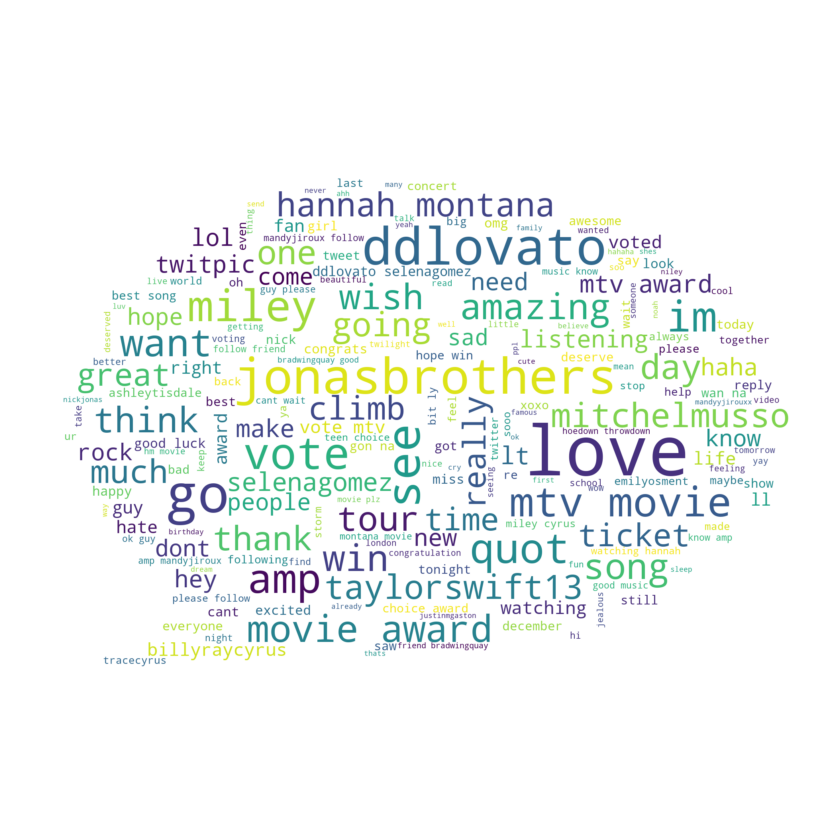

In [23]:
nlp_usuario1 = corpus_usuario_popular1[:,0]
usuario1_sin_stopwords = []
usuario1_lematizado = []

# Tokenización, Normalización y Remoción de StopWords
for sentence in nlp_usuario1:
  usuario1_sin_stopwords.append(remover_stopwords(sentence,'mileycyrus'))

# Lematización
for sentence in usuario1_sin_stopwords:
  usuario1_lematizado.append(lematizar(sentence))
  
# WordCloud
nube_palabras(usuario1_lematizado)

### Top Words Usuario No. 1

['love', 'award', 'ddlovato', 'movie', 'go', 'mtv', 'vote', 'amp', 'jonasbrothers', 'see']
[96, 66, 62, 60, 52, 52, 50, 45, 44, 39]


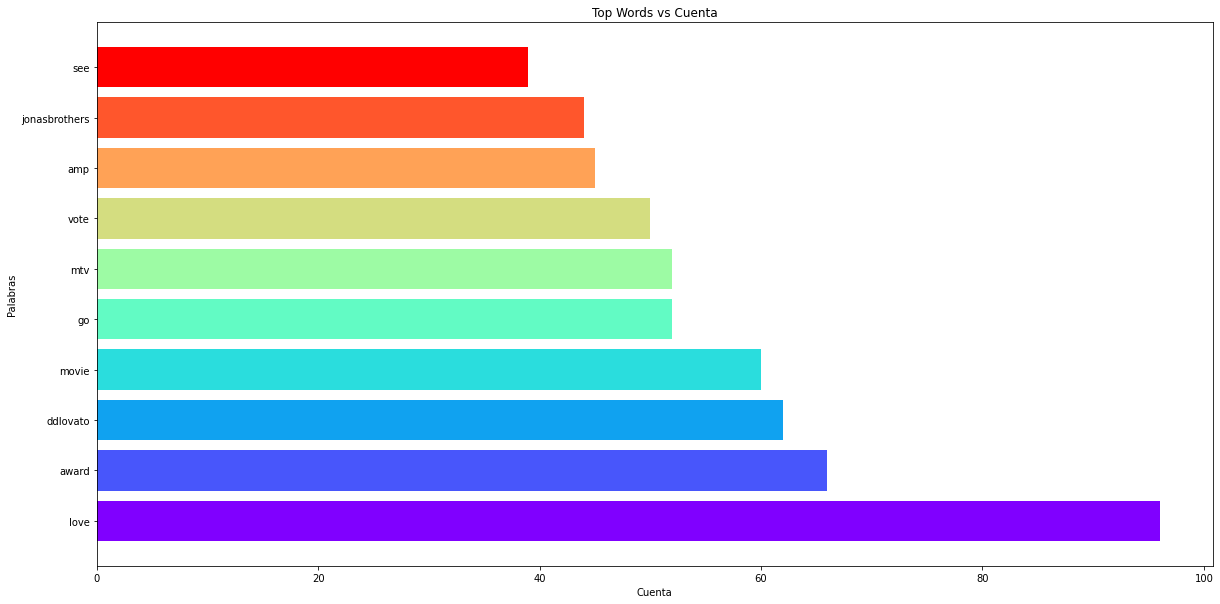

In [24]:
palabra,cuenta = top_palabras(usuario1_lematizado)
print(palabra)
print(cuenta)

### Razones por la que se cita al usuario @mileycyrus:
Al parecer existió una gran cantidad de tweets haciendo referencia a una premiación en MTV, con la participación de varios artistas, y se estuvo haciendo tendencia solicitando votación para este usuario. También se hace mención a otros usuarios (de hecho al segundo y el tercer usuario más popular). La palabra "LOVE" es la más utilizada en los tweets donde se menciona a este usuario **@mileycyrus**

### Procesamiento Usuario 2:

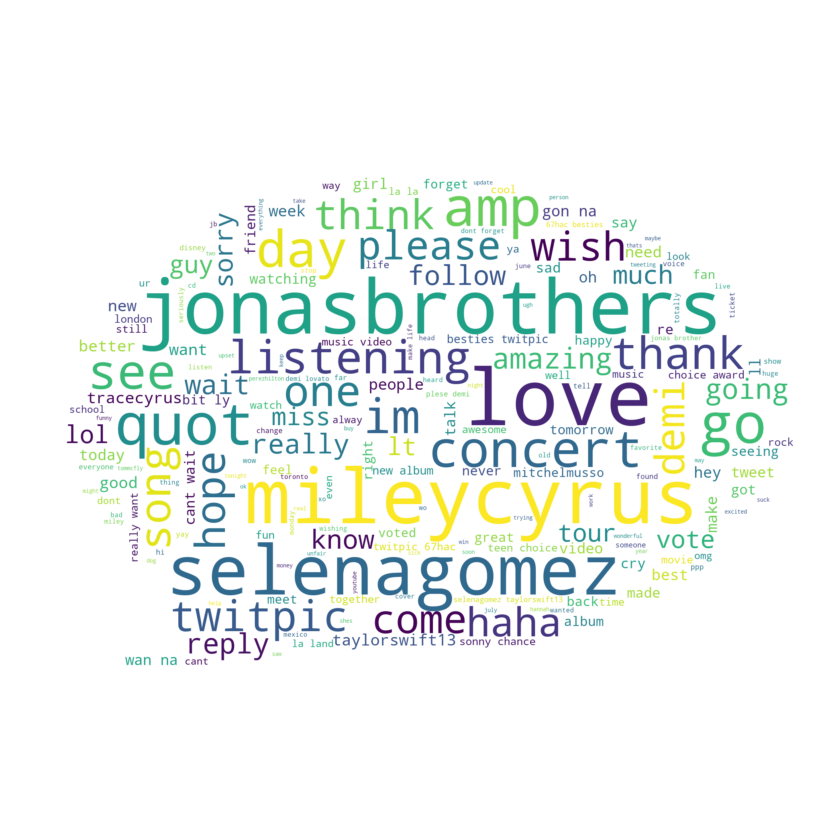

In [25]:
nlp_usuario2 = corpus_usuario_popular2[:,0]
usuario2_sin_stopwords = []
usuario2_lematizado = []

# Tokenización, Normalización y Remoción de StopWords
for sentence in nlp_usuario2:
  usuario2_sin_stopwords.append(remover_stopwords(sentence,'ddlovato'))

# Lematización
for sentence in usuario2_sin_stopwords:
  usuario2_lematizado.append(lematizar(sentence))
  
# WordCloud
nube_palabras(usuario2_lematizado)

### Top Words Usuario No. 2

['love', 'mileycyrus', 'jonasbrothers', 'selenagomez', 'http', 'quot', 'go', 'amp', 'concert', 'day']
[80, 76, 74, 74, 50, 46, 43, 41, 34, 34]


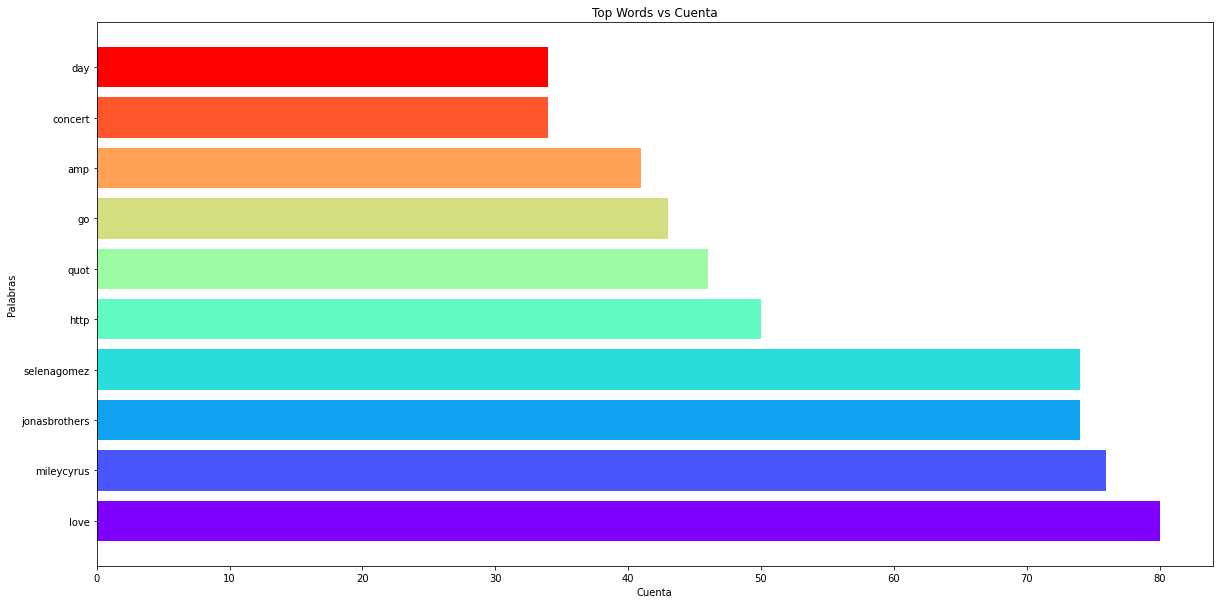

In [26]:
palabra,cuenta = top_palabras(usuario2_lematizado)
print(palabra)
print(cuenta)

### Razones por la que se cita al usuario @ddlovato:
Esta usuario se le menciona junto a otros dos artistas: el usuario No. 1 "Miley Cyrus" y a "Jonas Brothers". También la palabra más utilizada en los tweets donde se menciona a este usuario es "LOVE". También al parecer hubo una tendencia mencionando un concierto a realizarse en una fecha.

### Procesamiento Usuario 3:

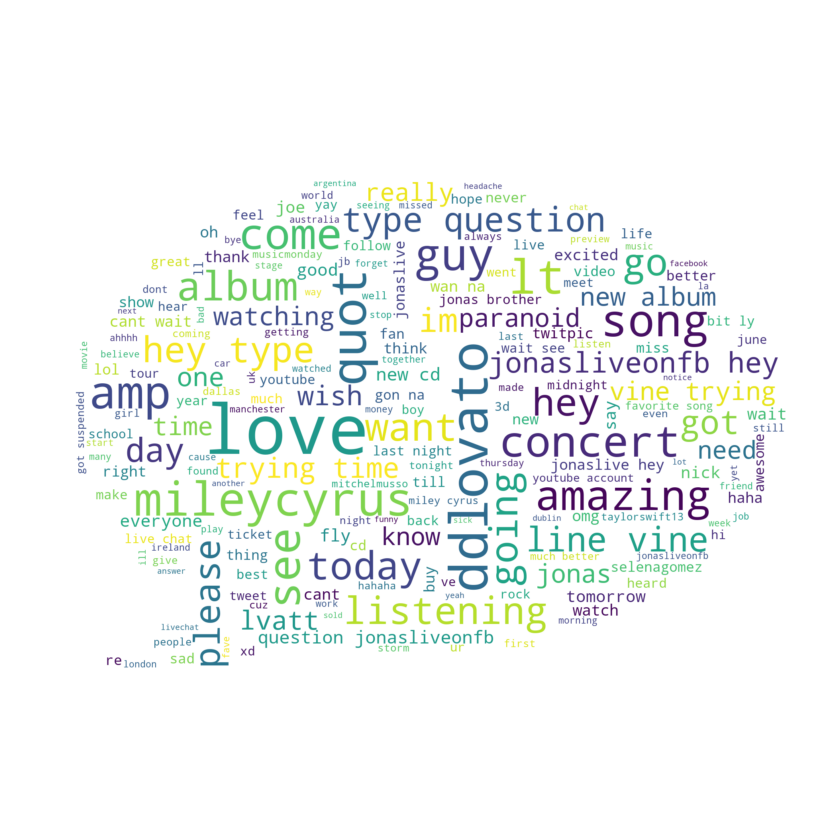

In [27]:
nlp_usuario3 = corpus_usuario_popular3[:,0]
usuario3_sin_stopwords = []
usuario3_lematizado = []

# Tokenización, Normalización y Remoción de StopWords
for sentence in nlp_usuario3:
  usuario3_sin_stopwords.append(remover_stopwords(sentence,'jonasbrothers'))

# Lematización
for sentence in usuario3_sin_stopwords:
  usuario3_lematizado.append(lematizar(sentence))
  
# WordCloud
nube_palabras(usuario3_lematizado)

### Top Words Usuario No. 3

['love', 'hey', 'ddlovato', 'see', 'album', 'song', 'new', 'quot', 'jonasliveonfb', 'lt']
[76, 62, 40, 36, 35, 35, 35, 35, 34, 32]


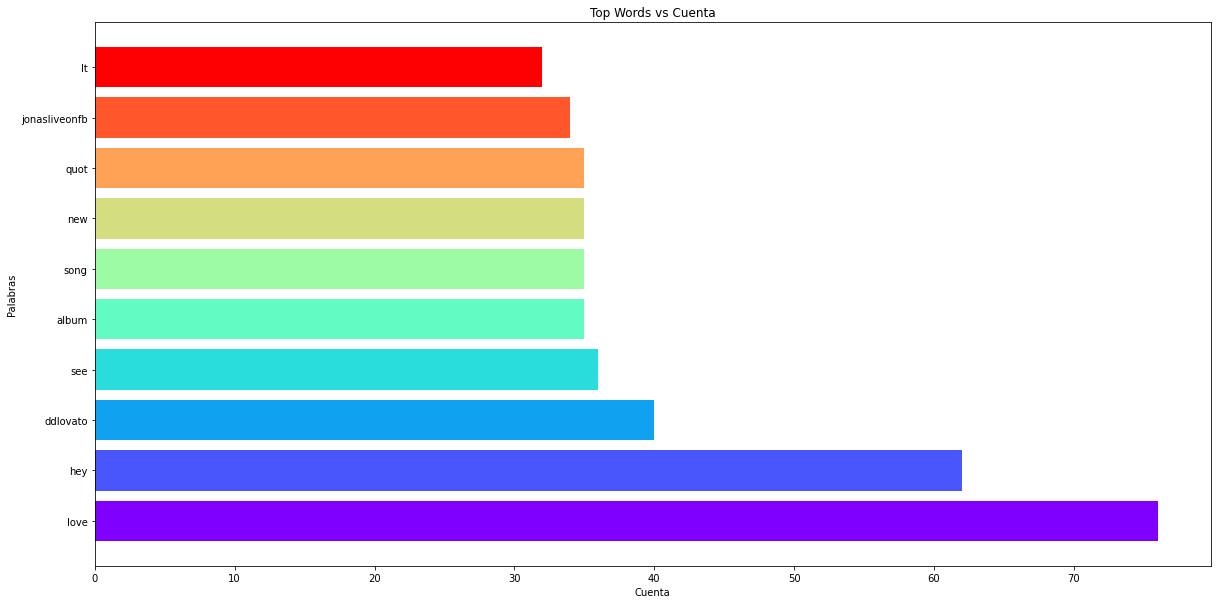

In [28]:
palabra,cuenta = top_palabras(usuario3_lematizado)
print(palabra)
print(cuenta)

### Razones por la que se cita al usuario @jonasbrothers:
A este usuario se le menciona en conjunto con el artista @ddlovato. La mayor parte de los tweets hacen referencia a un albúm del artista y a una canción, ambas con la palabra "nueva". También a presentaciones en vivo del usuario en Facebook.